# Gillespie simualtion of simple SIR model

https://en.wikipedia.org/wiki/Epidemic_model 

In [2]:
from __future__ import division
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline  

In [3]:
def Gillespie_SIR(N,beta,gamma,tmax):
    MAX = int(1e6) #Maximum size to store the data
    TVals   = np.zeros(MAX,dtype=float) #arrays of the max size to store values 
    SVals   = np.zeros(MAX,dtype=int)
    IVals   = np.zeros(MAX,dtype=int)
    
    I = int(np.ceil(0.01*N)) # Percentage of person infected from the total population
    S = N-I
    R = 0
    t = 0.0
    count = 0
    IVals[count] = I
    SVals[count] = S
    TVals[count] = t
     
    while t < tmax and I > 0 and count < MAX:
        Rate_S2I = beta*S*I #k1
        Rate_I2R = gamma*I  #k2
        K  = Rate_S2I + Rate_I2R #total rate
        dt = - (1.0/K)*np.log(random.random())#Choosing dt based from exponential distribution with mean 1/K(total rate)
                                              #random.random gives uniform distribution
        t += dt 
        count  += 1
        r = random.random()* K                 # Makes it easier to figure out events, "why uniform distribution?"
        
        if r < Rate_S2I:
            S -= 1
            I += 1
        else:
            I -= 1
            R += 1
        TVals[count]  = t  
        SVals[count] = S
        IVals[count] = I
    IVals = IVals[:count+1]
    TVals = TVals[:count+1]
    SVals = SVals[:count+1]
    print 'Number of events = ',count
    #-------------------------------------------#
    fig,ax = plt.subplots()
    ax.plot(TVals,SVals,'b-',label='S')
    ax.plot(TVals,IVals,'r-',label='I')
    ax.plot(TVals,N-SVals-IVals,'g-',label='R')
    ax.set_xlabel('time')
    ax.legend(loc='best')
    plt.show()
    return None
        

Number of events =  1990


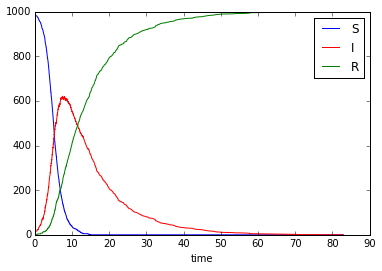

In [6]:
Gillespie_SIR(1000,0.001,0.1,100)